In [1]:
import sys
import importlib
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT
import coffea
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import vector
import dask_awkward as dak
import hist

Welcome to JupyROOT 6.30/07


/cvmfs/cms.cern.ch/el9_amd64_gcc12/lcg/root/6.30.07-024df6516c17fd2edef848a927a788f1/lib/ROOT/_facade.py:154: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  return _orig_ihook(name, *args, **kwds)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, w

In [2]:
sys.path.insert(0,"../python/HNL_Plotting_HelperFunctions")
import MuonSystemReader
import Produce_Cutflow_v2
import DNN_Helpers


In [3]:
importlib.reload(MuonSystemReader)
importlib.reload(DNN_Helpers)

<module 'DNN_Helpers' from '/uscms_data/d3/amalbert/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_Plotting_Scripts/../python/HNL_Plotting_HelperFunctions/DNN_Helpers.py'>

In [4]:
HNL_2GeV_10ctau_path = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/analyzer_update_111825/HNL_tau_mN_2_ctau_1000/normalized/HNL_tau_mN_2_ctau_1000.root"
signal_events  = MuonSystemReader.loadTree_nanoFactory(HNL_2GeV_10ctau_path)

HNL_2GeV_10ctau_path = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/analyzer_update_111825/HNL_e_mN_2_ctau_1000/normalized/HNL_e_mN_2_ctau_1000.root"
signal_events_e  = MuonSystemReader.loadTree_nanoFactory(HNL_2GeV_10ctau_path)

HNL_2GeV_10ctau_path = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/analyzer_update_111825/HNL_mu_mN_2_ctau_1000/normalized/HNL_mu_mN_2_ctau_1000.root"
signal_events_mu  = MuonSystemReader.loadTree_nanoFactory(HNL_2GeV_10ctau_path)


/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/factory.py:317: RuntimeWarning: You have set steps_per_file to 1, this should only be used for a
                small number of inputs (e.g. for early-stage/exploratory analysis) since it does not
                inform dask of each chunk lengths at creation time, which can cause unexpected
                slowdowns at scale. If you would like to process larger datasets please specify steps
                using the appropriate uproot "files" specification:
                    https://github.com/scikit-hep/uproot5/blob/v5.1.2/src/uproot/_dask.py#L109-L132.
                
  warnings.warn(
/uscms/home/amalbert/.local/lib/python3.9/site-packages/dask_awkward/lib/structure.py:911: UserWarning: Please ensure that dask.awkward<nCscRechitClusters, npartitions=1>
        is partitionwise-compatible with dask.awkward<getitem, npartitions=1>
        (e.g. counts comes from a dak.num(array, axis=1)),
        otherwise th

In [5]:
### NOTE: for this sample in data, the tau energy branch is messed up ###
data_path_base_tau = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_tau/"
data_path_base_e = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_e/"
data_path_base_mu  = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_mu/"

data_samples = ["Muon0-Run2024B-PromptReco-v1",
    "Muon0-Run2024C-PromptReco-v1",
    "Muon0-Run2024D-PromptReco-v1",
    "Muon0-Run2024E-PromptReco-v1",
    "Muon0-Run2024E-PromptReco-v2",
    "Muon0-Run2024F-PromptReco-v1",
    "Muon0-Run2024G-PromptReco-v1",
    "Muon0-Run2024H-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v2",
    "Muon1-Run2024B-PromptReco-v1",
    "Muon1-Run2024C-PromptReco-v1",
    "Muon1-Run2024D-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v2",
    "Muon1-Run2024F-PromptReco-v1",
    "Muon1-Run2024G-PromptReco-v1",
    "Muon1-Run2024H-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v2"
    ]

data_events_list_tau = [data_path_base_tau+sample+"/normalized/"+sample+"_goodLumi.root" for sample in data_samples]
data_events_tau  = MuonSystemReader.loadTree_nanoFactory(data_events_list_tau)
data_events_list_e = [data_path_base_e+sample+"/normalized/"+sample+"_goodLumi.root" for sample in data_samples]
data_events_e  = MuonSystemReader.loadTree_nanoFactory(data_events_list_e)
data_events_list_mu = [data_path_base_mu+sample+"/normalized/"+sample+"_goodLumi.root" for sample in data_samples]
data_events_mu  = MuonSystemReader.loadTree_nanoFactory(data_events_list_mu)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/dask_awkward/lib/structure.py:911: UserWarning: Please ensure that dask.awkward<nCscRechitClusters, npartitions=20>
        is partitionwise-compatible with dask.awkward<getitem, npartitions=20>
        (e.g. counts comes from a dak.num(array, axis=1)),
        otherwise this unflatten operation will fail when computed!
  warnings.warn(


### All Cluster Size

In [6]:
DNN_Scores_Signal = DNN_Helpers.get_DNN_array(signal_events)
DNN_Scores_Signal_e_tau = DNN_Helpers.get_DNN_array(signal_events, type="e")
DNN_Scores_Signal_mu_tau = DNN_Helpers.get_DNN_array(signal_events, type="mu")

/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

In [7]:
DNN_Scores_Signal_e = DNN_Helpers.get_DNN_array(signal_events_e, type="e")
DNN_Scores_Signal_mu = DNN_Helpers.get_DNN_array(signal_events_mu, type="mu")

/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

In [8]:
DNN_Scores_Data = DNN_Helpers.get_DNN_array(data_events_tau, type="tau")
DNN_Scores_Data_e = DNN_Helpers.get_DNN_array(data_events_e, type="e")
DNN_Scores_Data_mu = DNN_Helpers.get_DNN_array(data_events_mu, type="mu")

/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

In [8]:
#get station veto+NStation10>1 eff
eff_pair = (DNN_Helpers.get_stationVeto_eff(data_events), DNN_Helpers.get_stationVeto_eff(signal_events))
eff_pair

(0.011898147295900363, 0.21214574898785424)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

In [9]:
sample_scores = np.concatenate([np.linspace(0, 0.99, 398), np.linspace(0.99, 1, 201)])


Text(0, 0.5, 'Density')

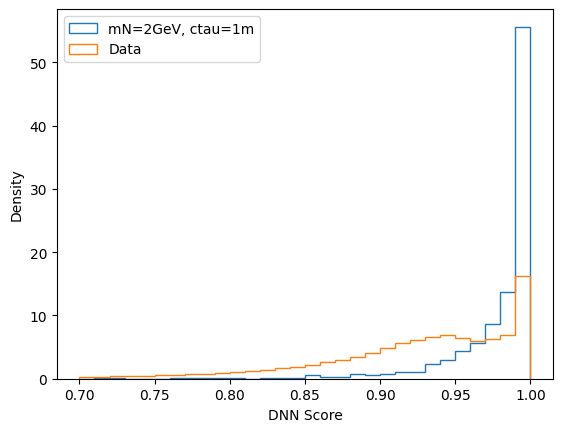

In [10]:
bins = np.linspace(0.7, 1, 31)
plt.hist(DNN_Scores_Signal, label="mN=2GeV, ctau=1m", density=True, histtype='step', bins=bins)
plt.hist(DNN_Scores_Data, label="Data", density=True, histtype='step', bins=bins)
plt.legend()
plt.xlabel("DNN Score")
plt.ylabel("Density")
#plt.grid()

In [11]:
effs_signal, effs_data, eff_ratio = DNN_Helpers.signalEff_bkgEff(DNN_Scores_Signal, DNN_Scores_Data, sample_scores)
eff_signal_e_tau, eff_data_e_tau, eff_ratio_e_tau = DNN_Helpers.signalEff_bkgEff(DNN_Scores_Signal_e_tau, DNN_Scores_Data_e, sample_scores)
eff_signal_mu_tau, eff_data_mu_tau, eff_ratio_mu_tau = DNN_Helpers.signalEff_bkgEff(DNN_Scores_Signal_mu_tau, DNN_Scores_Data_mu, sample_scores)
effs_signal_e, effs_data_e, eff_ratio_e = DNN_Helpers.signalEff_bkgEff(DNN_Scores_Signal_e, DNN_Scores_Data_e, sample_scores)
effs_signal_mu, effs_data_mu, eff_ratio_mu = DNN_Helpers.signalEff_bkgEff(DNN_Scores_Signal_mu, DNN_Scores_Data_mu, sample_scores)

In [12]:
ROC_x = np.linspace(0,1,101)
ROC_y = ROC_x

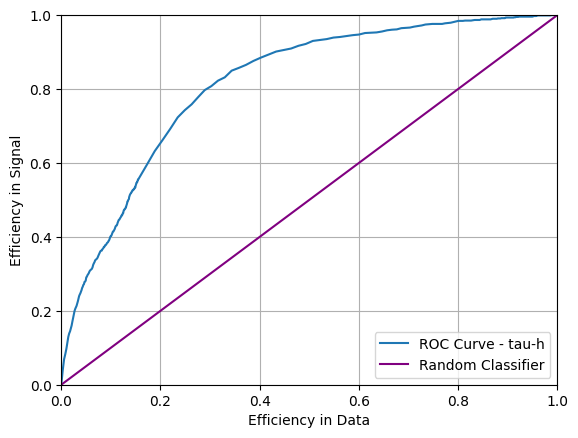

In [13]:
plt.plot(effs_data, effs_signal, label="ROC Curve - tau-h")
#plt.plot(eff_data_e_tau, eff_signal_e_tau, label="ROC Curve - tau-e")
#plt.plot(eff_data_mu_tau, eff_signal_mu_tau, label="ROC Curve - tau-mu")
#plt.plot(effs_data_e, effs_signal_e, label="ROC Curve - e")
#plt.plot(effs_data_mu, effs_signal_mu, label="ROC Curve - mu")
#plt.scatter(eff_pair[0], eff_pair[1], s=20, color='black', label="StationVeto+NStation10>1")
plt.plot(ROC_x, ROC_y, label="Random Classifier", color='purple')
plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("Efficiency in Data")
plt.ylabel("Efficiency in Signal")
plt.grid()

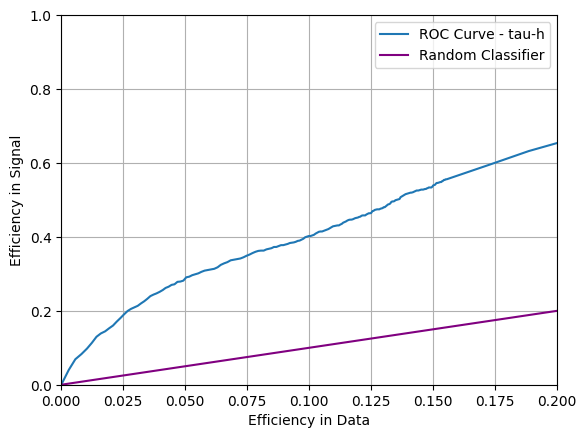

In [14]:
plt.plot(effs_data, effs_signal, label="ROC Curve - tau-h")
# plt.plot(eff_data_e_tau, eff_signal_e_tau, label="ROC Curve - tau-e")
# plt.plot(eff_data_mu_tau, eff_signal_mu_tau, label="ROC Curve - tau-mu")
# plt.plot(effs_data_e, effs_signal_e, label="ROC Curve - e")
# plt.plot(effs_data_mu, effs_signal_mu, label="ROC Curve - mu")
#plt.scatter(eff_pair[0], eff_pair[1], s=20, color='black', label="StationVeto+NStation10>1")
plt.plot(ROC_x, ROC_y, label="Random Classifier", color='purple')
plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(0,0.2)
plt.ylim(0,1)
plt.xlabel("Efficiency in Data")
plt.ylabel("Efficiency in Signal")
plt.grid()

In [17]:
#compute AUC
import sklearn.metrics
auc = sklearn.metrics.auc(effs_data, effs_signal)
auc

0.816509560043361

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


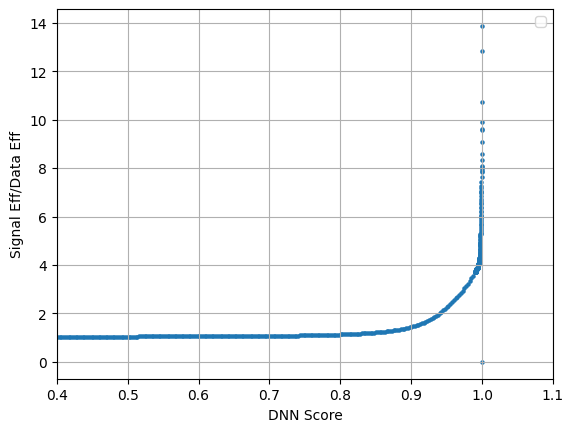

In [ ]:
plt.scatter(sample_scores, eff_ratio, s=5)
plt.plot(ROC_x, ROC_y, label="Random Classifier", color='red')
plt.legend()
plt.xlim(0.4,1.1)
plt.ylim(0,1)
plt.xlabel("DNN Score")
plt.ylabel("Signal Eff/Data Eff")
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


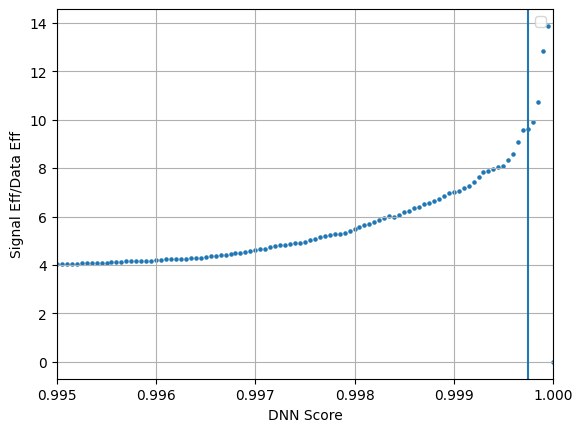

In [15]:
plt.scatter(sample_scores, eff_ratio, s=5)
#plt.plot(ROC_x, ROC_y, label="Random Classifier", color='red')
plt.legend()
plt.xlim(0.995,1)
plt.axvline(0.99975)
#plt.ylim(0,1)
plt.xlabel("DNN Score")
plt.ylabel("Signal Eff/Data Eff")
plt.grid()

In [16]:
#check with DNN WP gives the data efficiency most similar to stationveto
stationVeto_dataEff = 0.011898147295900363
bestPos = ak.argmin(abs(effs_data-ak.ones_like(effs_data)*stationVeto_dataEff))

print(sample_scores[bestPos])
print(abs(effs_data-ak.ones_like(effs_data)*stationVeto_dataEff)[bestPos])


0.99975
0.0001921230583190707


### Same study, but also require clusterSize>=160

In [15]:
DNN_Scores_Signal_160 = DNN_Helpers.get_DNN_array(signal_events, clusterSizeCut=True)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41187 instead
  warnings.warn(


/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

In [16]:
DNN_Scores_Data_160 = DNN_Helpers.get_DNN_array(data_events, clusterSizeCut=True)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37903 instead
  warnings.warn(


/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

In [17]:
#get station veto+NStation10>1 eff
eff_pair_160 = (DNN_Helpers.get_stationVeto_eff(data_events, clusterSizeCut=True), DNN_Helpers.get_stationVeto_eff(signal_events, clusterSizeCut=160))
eff_pair_160

/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40173 instead
  warnings.warn(


/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38489 instead
  warnings.warn(


(0.019624901650197046, 0.23991507430997877)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

Text(0, 0.5, 'Density')

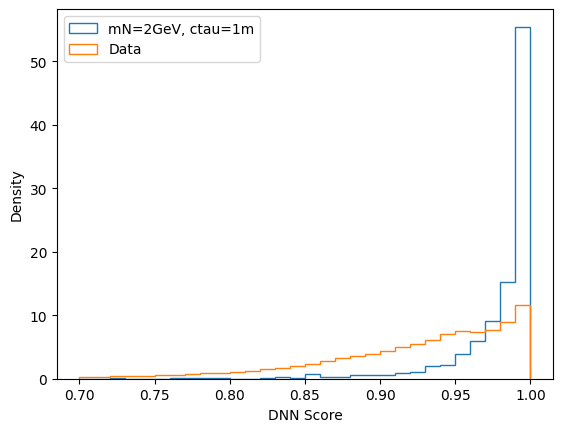

In [18]:
bins = np.linspace(0.7, 1, 31)
plt.hist(DNN_Scores_Signal_160, label="mN=2GeV, ctau=1m", density=True, histtype='step', bins=bins)
plt.hist(DNN_Scores_Data_160, label="Data", density=True, histtype='step', bins=bins)
plt.legend()
plt.xlabel("DNN Score")
plt.ylabel("Density")
#plt.grid()

In [19]:
effs_signal_160, effs_data_160, eff_ratio_160 = DNN_Helpers.signalEff_bkgEff(DNN_Scores_Signal_160, DNN_Scores_Data_160, sample_scores)

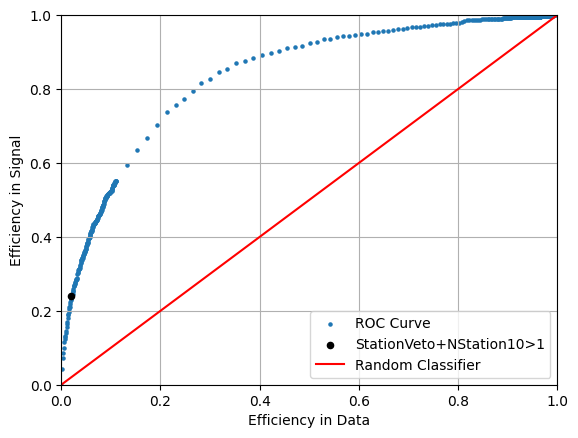

In [20]:
plt.scatter(effs_data_160, effs_signal_160, s=5, label="ROC Curve")
plt.scatter(eff_pair_160[0], eff_pair_160[1], s=20, color='black', label="StationVeto+NStation10>1")
plt.plot(ROC_x, ROC_y, label="Random Classifier", color='red')
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("Efficiency in Data")
plt.ylabel("Efficiency in Signal")
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


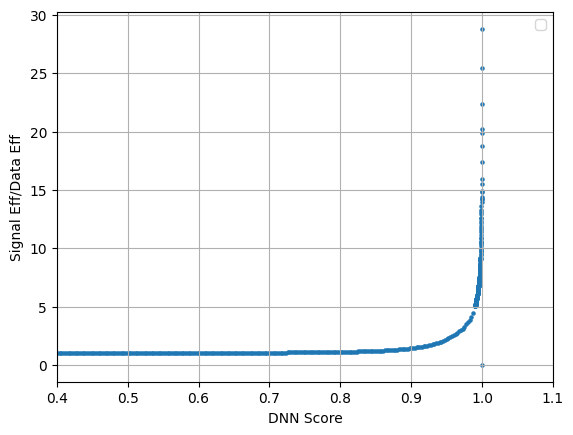

In [21]:
plt.scatter(sample_scores, eff_ratio_160, s=5)
#plt.plot(ROC_x, ROC_y, label="Random Classifier", color='red')
plt.legend()
plt.xlim(0.4,1.1)
#plt.ylim(0,1)
plt.xlabel("DNN Score")
plt.ylabel("Signal Eff/Data Eff")
plt.grid()

### Comparing ROC Curves with and Without Cluster Cut

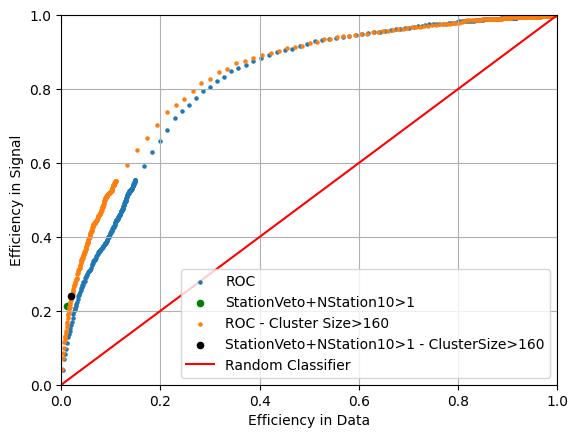

In [22]:
plt.scatter(effs_data, effs_signal, s=5, label="ROC")
plt.scatter(eff_pair[0], eff_pair[1], s=20, color='green', label="StationVeto+NStation10>1")
plt.scatter(effs_data_160, effs_signal_160, s=5, label="ROC - Cluster Size>160")
plt.scatter(eff_pair_160[0], eff_pair_160[1], s=20, color='black', label="StationVeto+NStation10>1 - ClusterSize>160")
plt.plot(ROC_x, ROC_y, label="Random Classifier", color='red')
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("Efficiency in Data")
plt.ylabel("Efficiency in Signal")
plt.grid()